# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [274]:
import pandas as pd
# import pandas

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [303]:
df1 = pd.read_csv('imdb_1000.csv')
# load imdb dataset as pandas dataframe

In [304]:
df1[:5]
#show first 5 rows of imdb_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [305]:
d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
bikes_df = pd.read_csv("bikes.csv",sep = ';', parse_dates = ['Date'], date_parser = d_parser)

<ipython-input-305-aab6ae9ec44b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')


In [306]:
bikes_df# show first 3 rows of bikes_df

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN
362,2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN
363,2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN
364,2012-12-30,00:00,0,5,1,5,NaN,6,0,0,NaN


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [307]:
for col in df1.columns:
    print(col,end=', ')# list columns of imdb_df

star_rating, title, content_rating, genre, duration, actors_list, 

In [308]:
for col in df1.columns:
    print(type(col))# what are the datatypes of values in columns

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [309]:
df1[0:4]['title']# list first 5 movie titles

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
Name: title, dtype: object

In [310]:
df1[['title','genre']]# show only movie title and genre

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [311]:
type(df1['duration'])
# show the type of duration column

pandas.core.series.Series

In [312]:
df1['duration'].values
# show duration values of movies as numpy arrays

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [313]:
df1['title'].apply(lambda x: x.upper())
# convert all the movie titles to uppercase

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

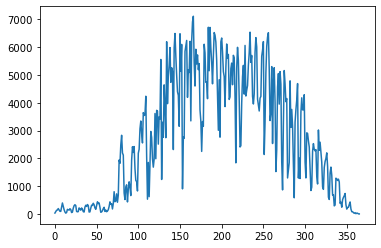

In [314]:
bikes_df['Berri1'].plot()
# plot the bikers travelling to Berri1 over the year

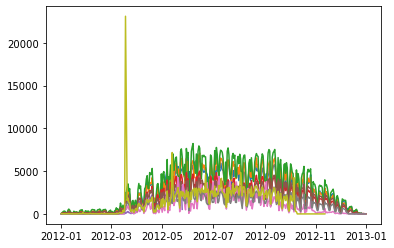

In [315]:
plt.plot(bikes_df['Date'],bikes_df.loc[0:,'Rachel / Papineau' : 'Pont_Jacques_Cartier'])
# plot all the columns of bikes_df

## Value counts

Get count of unique values in a particular column/Series.

In [316]:
df1['genre'].value_counts().to_frame().index
# what are the unique genre in imdb_df?

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery', 'Western', 'Sci-Fi', 'Thriller',
       'Film-Noir', 'Family', 'History', 'Fantasy'],
      dtype='object')

<BarContainer object of 16 artists>

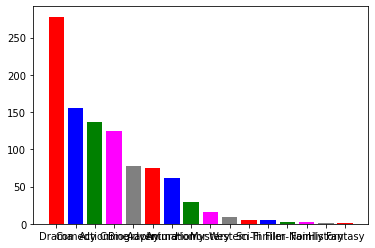

In [317]:
import matplotlib.pyplot as plt
import numpy as np
height=df1['genre'].value_counts().values
left=np.arange(1,len(height)+1)
tick_label=df1['genre'].value_counts().to_frame().index


plt.bar(left,height,tick_label=tick_label,width=0.8,color=['red','blue','green','magenta','grey'])
# plotting value counts of unique genres as a bar chart

([<matplotlib.patches.Wedge at 0x1d617ead400>,
 [Text(0.690559401763845, 0.856228773538685, 'Drama'),
  Text(-0.7203468250294089, 0.8313245164615624, 'Comedy'),
  Text(-1.0964621095255178, -0.088152381560861, 'Action'),
  Text(-0.6711534366177855, -0.871523415931056, 'Crime'),
  Text(-0.012354275373648511, -1.0999306213939097, 'Biography'),
  Text(0.504572064539456, -0.9774492476268991, 'Adventure'),
  Text(0.872599162768846, -0.6697542094941316, 'Animation'),
  Text(1.0284697334606816, -0.3901922697277776, 'Horror'),
  Text(1.0739150063166638, -0.2381313906394535, 'Mystery'),
  Text(1.0895445082523985, -0.15130355097300066, 'Western'),
  Text(1.0952403048166697, -0.10221875906646853, 'Sci-Fi'),
  Text(1.0979560559559636, -0.06702610826853214, 'Thriller'),
  Text(1.0993147704334387, -0.038820555210815164, 'Film-Noir'),
  Text(1.0997961156637863, -0.0211779123345034, 'Family'),
  Text(1.0999490280060602, -0.0105894187056497, 'History'),
  Text(1.0999943365267277, -0.0035298171516920116,

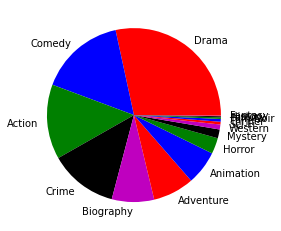

In [318]:
genres=df1['genre'].value_counts().to_frame().index
values=df1['genre'].value_counts().values.astype(int)
colors=['r','b','g','k','m']

plt.pie(values,labels=genres,colors=colors)
# plotting value counts of unique genres as a pie chart

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [319]:
bikes_df.index
# show index of bikes_df

RangeIndex(start=0, stop=366, step=1)

In [320]:
count=0
for element in bikes_df[['Date']]:
    if element=='01/01/2012':
        i=count
    count+=1
bikes_df.loc[count]
# get row for date 2012-01-01

Date                           2012-01-02 00:00:00
Unnamed: 1                                   00:00
Rachel / Papineau                               43
Berri1                                          83
Maisonneuve_2                                  153
Maisonneuve_1                                   68
Brébeuf                                         11
Parc                                            53
PierDup                                          6
CSC (Côte Sainte-Catherine)                      1
Pont_Jacques_Cartier                            21
Name: 1, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [321]:
df1.iloc[11]
# show 11th row of imdb_df using iloc

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [322]:
print(df1[imdb_df['genre']=='Adventure'].title)
# select only those movies where genre is adventure

7          The Lord of the Rings: The Return of the King
10     The Lord of the Rings: The Fellowship of the Ring
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
54                                    Back to the Future
                             ...                        
936                                            True Grit
937                                            Labyrinth
943                                      The Bucket List
953                                The NeverEnding Story
975                          Back to the Future Part III
Name: title, Length: 75, dtype: object


In [323]:
max(df1[(df1['star_rating']>8) & (df1['duration']>130)].genre)
#hich genre has highest number of movies with star rating above 8 and duration more than 130 minutes?

'Western'

## Adding a new column to DataFrame

In [324]:
bikes_df['weekday']=bikes_df['Date'].dt.day_name()
bikes_df
# add a weekday column to bikes_df

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,00:00,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting an existing column from DataFrame

In [325]:
bikes_df.drop('Unnamed: 1',axis=1,inplace=True)
bikes_df
# remove column 'Unnamed: 1' from bikes_df

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting a row in DataFrame

In [326]:
bikes_df.drop(0,axis=0,inplace=True)
bikes_df
# remove row no. 1 from bikes_df

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
1,2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
5,2012-01-06,75,146,244,98,4.0,86,4,0,17.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [327]:
genre_grp = df1.groupby(['genre'])
genre_grp
# group imdb_df by movie genres

In [328]:
grouped.get_group('Crime')
# get crime movies group

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142.824561,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,142.824561,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,142.824561,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,142.824561,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130.000000,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
40,8.5,The Green Mile,R,Crime,189.000000,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151.000000,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."
78,8.4,Once Upon a Time in America,R,Crime,229.000000,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
86,8.4,A Clockwork Orange,X,Crime,136.000000,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
112,8.3,L.A. Confidential,R,Crime,138.000000,"[u'Kevin Spacey', u'Russell Crowe', u'Guy Pear..."


In [337]:
duration_mean=grouped['duration'].agg(np.mean)
duration_mean
# get mean of movie durations for each group

genre
Action       141.522462
Adventure    154.304348
Animation    126.333333
Biography    143.470588
Comedy       138.413793
Crime        141.075408
Drama        143.385621
Horror       129.200000
Mystery      135.571429
Sci-Fi       132.000000
Western      148.571429
Name: duration, dtype: float64

In [339]:
mean=lambda x: x.mean()
grouped.transform(mean)
# change duration of all movies in a particular genre to mean duration of the group

,star_rating,duration
0,7.938596,141.075408
1,7.938596,141.075408
2,7.938596,141.075408
3,7.967568,141.522462
4,7.938596,141.075408
...,...,...
967,7.967568,141.522462
968,7.921569,143.385621
973,7.921569,143.385621
976,7.967568,141.522462


In [331]:
n = len(df1.index)
for i in range(n):
    if (df1.loc[i,'duration'] <= 120) : 
        df1.drop(i,inplace = True)

df1
# drop groups/genres that do not have average movie duration greater than 120.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,141.075408,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,141.075408,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,141.075408,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,141.522462,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,141.075408,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
967,7.4,The Rock,R,Action,136.000000,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
968,7.4,The English Patient,R,Drama,162.000000,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
973,7.4,The Cider House Rules,PG-13,Drama,126.000000,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138.000000,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [332]:
weekday_grp = bikes_df.groupby(['weekday'])
# group weekday wise bikers count

In [344]:
day_lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sum_lst = []
for i in range(7):
    sum_lst.append(weekday_grp.get_group(day_lst[i]).agg(np.sum))

sum_lst
# get weekday wise biker count

[Rachel / Papineau                                                         138881
 Berri1                                                                    142285
 Maisonneuve_2                                                             174610
 Maisonneuve_1                                                              95565
 Brébeuf                                                                    15436
 Parc                                                                       97001
 PierDup                                                                    47259
 CSC (Côte Sainte-Catherine)                                                64011
 Pont_Jacques_Cartier                                                       74692
 weekday                        MondayMondayMondayMondayMondayMondayMondayMond...
 dtype: object,
 Rachel / Papineau                                                         131632
 Berri1                                                                    145795


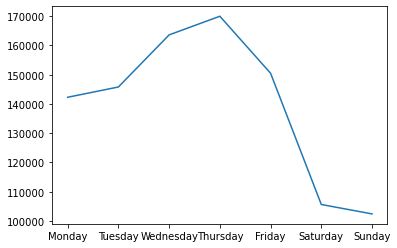

In [334]:
Berri1_sum = []
for i in range(7):
   Berri1_sum.append(weekday_grp.get_group(day_lst[i]).sum().loc['Berri1'])

plt.plot(day_lst,Berri1_sum)
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)